In this project I will try to predict which current NBA players will be accepted to the NBA Hall of Fame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

I have a collection of files with data. I will create dataframes for all of them and then will concentrate all the needed information in one dataframe.

Let me list the features I would rather have in my dataset(everything is in totals for the whole career of a player):

1) pts - number of points scored

2) assists - number of assists made

3) reb - number of rebounds

4) steals - number of steals made

5) blocks - number of blocks made

6) games - number of games played

7) minutes - number of minutes played

8) player - player's name

9) birth_year - year of birth of a player

10) first_seas - first season played

11) last_seas - last season played

12) num_seasons - number of seasons played

13) All NBA 1st team - number of times a player was selected to the All NBA 1st team of the season

14) All NBA 2nd team - number of times a player was selected to the All NBA 2nd team of the season

15) All NBA 3rd team - number of times a player was selected to the All NBA 3rd team of the season

16) All Defense  1st team - number of times a player was selected to the NBA All Defense 1st team of the season

17) All Defense  2nd team - number of times a player was selected to the NBA All Defense 2nd team of the season

18) All Rookie 1st team - number of times a player was selected to the NBA All Rookie 1st team of the season

19) All Rookie 2nd team - number of times a player was selected to the NBA All Rookie 2nd team of the season

20) All ABA 1st team - number of times a player was selected to the All ABA 1st team of the season

21) All ABA 2nd team - number of times a player was selected to the All ABA 2nd team of the season

22) All Star appearances - number of times a player was selected to play in the All Star game

23) MVPs - number of times a player was the Most Valuable Player of a season

24) DPOY - number of times a player was the Defensive Player of the Year 

25) NBA ROY - whether a player was the Rookie of the Year 

26) MIP - whether a player was the Most Improved Player

27) SMOY - number of times a player was the Sixth Man of the Year

28) ABA MVP - number of times a player was the ABA Most Valuable Player

29) ABA ROY - whether a player was the ABA Rookie of the Year

30) Championships - number of championships a player won

31) Finals MVP - number of times a player was the NBA Finals Most Valuable Player

32) Scoring Champ - number of times a player averaged the most points per game in one season

33) NBA Assist Leader - number of times a player averaged the most assists per game in one season

34) NBA Rebounding Leader - number of times a player averaged the most rebounds per game in one season

35) NBA Steal Champ - number of times a player averaged the most steals per game in one season

36) NBA Block Champ - number of times a player averaged the most blocks per game in one season

37) All-Star game MVP - number of times a player was the Most Valuable Player of the All-Star game

38) Conference Finals MVP - number of times a player was the Most Valuable Player of the Conference Finals

39) NBA 75 Team - whether a player is a member of the NBA 75 team

40) ABA All-Time Team - whether a player is a member of the ABA All-Time Team

41) eFG% - effective field goal percentage of a player

42) PER - player efficiency rating

43) hof - whether player is in Hall of Fame







In [2]:
player_totals=pd.read_csv('Player Totals.csv')
player_season_info=pd.read_csv('Player Season Info.csv')
player_career_info=pd.read_csv('Player Career Info.csv')
player_award_shares=pd.read_csv('Player Award Shares.csv')
all_star=pd.read_csv('All-Star Selections.csv')
advanced=pd.read_csv('Advanced.csv')
end_of_season=pd.read_csv('End of Season Teams.csv')
hof=player_career_info

In [3]:
hof.columns

Index(['player_id', 'player', 'birth_year', 'hof', 'num_seasons', 'first_seas',
       'last_seas'],
      dtype='object')

In [4]:
hof

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951
...,...,...,...,...,...,...,...
5019,5020,Xavier Moon,NaN,False,1,2022,2022
5020,5021,Xavier Sneed,NaN,False,1,2022,2022
5021,5022,Yves Pons,NaN,False,1,2022,2022
5022,5023,Zavier Simpson,NaN,False,1,2022,2022


'hof' dataframe has the information about whether player is in Hall of Fame or not, that's what we need

In [5]:
player_totals

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,29646,2022,4219,Aaron Gordon,NaN,PF,26.0,8,NBA,DEN,...,0.743,125.0,314.0,439.0,188,44.0,44.0,133.0,148,1126
1,29647,2022,4899,Aaron Henry,NaN,SF,22.0,1,NBA,PHI,...,NaN,0.0,1.0,1.0,0,0.0,2.0,2.0,2,2
2,29648,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,TOT,...,0.868,24.0,98.0,122.0,153,42.0,9.0,67.0,92,400
3,29649,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,WAS,...,0.800,9.0,58.0,67.0,78,24.0,9.0,39.0,60,251
4,29650,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,PHO,...,0.939,15.0,40.0,55.0,75,18.0,0.0,28.0,32,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30452,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,0.500,NaN,NaN,NaN,6,NaN,NaN,NaN,16,23
30453,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,0.511,NaN,NaN,NaN,16,NaN,NaN,NaN,59,85
30454,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,0.534,NaN,NaN,NaN,37,NaN,NaN,NaN,114,253
30455,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,0.477,NaN,NaN,NaN,1,NaN,NaN,NaN,25,61


In [6]:
player_totals.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

I will extract number of points, assists, rebounds and other valuable totals from this dataset.

In [7]:
list=hof['player']

points=[]
assists=[]
reb=[]
blocks=[]
steals=[]
games=[]
minutes=[]

for i in list:
    points.append(player_totals[player_totals['player']==i].sum()['pts'])
    assists.append(player_totals[player_totals['player']==i].sum()['ast'])
    reb.append(player_totals[player_totals['player']==i].sum()['trb'])
    blocks.append(player_totals[player_totals['player']==i].sum()['blk'])
    steals.append(player_totals[player_totals['player']==i].sum()['stl'])
    games.append(player_totals[player_totals['player']==i].sum()['g'])
    minutes.append(player_totals[player_totals['player']==i].sum()['mp'])
hof['points']=points
hof['assists']=assists    
hof['reb']=reb
hof['blocks']=blocks
hof['steals']=steals
hof['games']=games
hof['minutes']=minutes


I need to extract info about end of season teams

In [8]:
allnba1=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-NBA')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==3:
        x=a['number_tm'].value_counts()['1st']
    elif a['number_tm'].value_counts().count()==2:
        if (a['number_tm'].value_counts().index[0]=='1st') | (a['number_tm'].value_counts().index[1]=='1st'):
            x=a['number_tm'].value_counts()['1st']
        else:
            x=0
    else:
        if a['number_tm'].value_counts().index[0]!='1st':
            x=0
        else:
            x=a['number_tm'].value_counts()['1st']
            
    allnba1.append(x)    
hof['All NBA 1st team']=allnba1        

In [9]:
allnba2=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-NBA')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==3:
        x=a['number_tm'].value_counts()['2nd']
    elif a['number_tm'].value_counts().count()==2:
        if (a['number_tm'].value_counts().index[0]=='2nd') | (a['number_tm'].value_counts().index[1]=='2nd'):
            x=a['number_tm'].value_counts()['2nd']
        else:
            x=0
    else:
        if a['number_tm'].value_counts().index[0]!='2nd':
            x=0
        else:
            x=a['number_tm'].value_counts()['2nd']
            
    allnba2.append(x)    
hof['All NBA 2nd team']=allnba2        

In [10]:
allnba3=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-NBA')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==3:
        x=a['number_tm'].value_counts()['3rd']
    elif a['number_tm'].value_counts().count()==2:
        if (a['number_tm'].value_counts().index[0]=='3rd') | (a['number_tm'].value_counts().index[1]=='3rd'):
            x=a['number_tm'].value_counts()['3rd']
        else:
            x=0
    else:
        if a['number_tm'].value_counts().index[0]!='3rd':
            x=0
        else:
            x=a['number_tm'].value_counts()['3rd']
            
    allnba3.append(x)    
hof['All NBA 3rd team']=allnba3        

In [11]:
allnbadef=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-Defense')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['1st']
    else:
        if a['number_tm'].value_counts().index[0]!='1st':
            x=0
        else:
            x=a['number_tm'].value_counts()['1st']
            
    allnbadef.append(x)    
hof['All Defense 1st team']=allnbadef        

In [12]:
allnbadef2=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-Defense')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['2nd']
    else:
        if a['number_tm'].value_counts().index[0]!='2nd':
            x=0
        else:
            x=a['number_tm'].value_counts()['2nd']
            
    allnbadef2.append(x)    
hof['All Defense 2nd team']=allnbadef2        

In [13]:
allrooks=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-Rookie')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['1st']
    else:
        if a['number_tm'].value_counts().index[0]!='1st':
            x=0
        else:
            x=a['number_tm'].value_counts()['1st']
            
    allrooks.append(x)    
hof['All Rookie 1st team']=allrooks        

In [14]:
allrooks2=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-Rookie')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['2nd']
    else:
        if a['number_tm'].value_counts().index[0]!='2nd':
            x=0
        else:
            x=a['number_tm'].value_counts()['2nd']
            
    allrooks2.append(x)    
hof['All Rookie 2nd team']=allrooks2        

In [15]:
allaba=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-ABA')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['1st']
    else:
        if a['number_tm'].value_counts().index[0]!='1st':
            x=0
        else:
            x=a['number_tm'].value_counts()['1st']
            
    allaba.append(x)    
hof['All ABA 1st team']=allaba        

In [16]:
allaba2=[]
for i in list:
    a=end_of_season[(end_of_season['type']=='All-ABA')&(end_of_season['player']==i)]
    if a.empty:
        x=0     
    elif a['number_tm'].value_counts().count()==2:
        x=a['number_tm'].value_counts()['2nd']
    else:
        if a['number_tm'].value_counts().index[0]!='2nd':
            x=0
        else:
            x=a['number_tm'].value_counts()['2nd']
            
    allaba2.append(x)    
hof['All ABA 2nd team']=allaba2        

In [17]:
allstar=[]
for i in list:
    a=all_star[all_star['player']==i]
    if a.empty:
        x=0     
    else:
        x=a['replaced'].count()
            
    allstar.append(x)    
hof['All Star appearances']=allstar        

In [18]:
mvp=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='nba mvp')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    mvp.append(x)    
hof['MVPs']=mvp        

In [19]:
dpoy=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='dpoy')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    dpoy.append(x)    
hof['DPOY']=dpoy        

In [20]:
nba_roy=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='nba roy')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    nba_roy.append(x)    
hof['NBA ROY']=nba_roy        

In [21]:
mip=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='mip')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    mip.append(x)    
hof['MIP']=mip        

In [22]:
smoy=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='smoy')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    smoy.append(x)    
hof['SMOY']=smoy        

In [23]:
aba_mvp=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='aba mvp')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    aba_mvp.append(x)    
hof['ABA MVP']=aba_mvp        

In [24]:
aba_rook=[]
for i in list:
    a=player_award_shares[(player_award_shares['award']=='aba roy')&(player_award_shares['player']==i)]
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    aba_rook.append(x)    
hof['ABA ROY']=aba_rook        

Now I need to extract data from 'NBA_players_clean.csv' file, I need information about number of championships, scoring champs and etc.

In [25]:
clean=pd.read_csv('NBA_players_clean.csv')
clean.columns

Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team'],
      dtype='object')

In [26]:
clean['Player']

0             Alaa Abdelnaby
1            Zaid Abdul-Aziz
2       Kareem Abdul-Jabbar*
3         Mahmoud Abdul-Rauf
4          Tariq Abdul-Wahad
                ...         
5018              Ante Žižić
5019                Jim Zoet
5020               Bill Zopf
5021             Ivica Zubac
5022              Matt Zunic
Name: Player, Length: 5023, dtype: object

Some players have asterisks after their name.

In [27]:
def cut_string(str):
    if '*' in str:
        return str.split('*')[0]
    else:
        return str
clean['player']=clean['Player'].apply(lambda x:cut_string(x))
    


In [28]:
clean['player']

0            Alaa Abdelnaby
1           Zaid Abdul-Aziz
2       Kareem Abdul-Jabbar
3        Mahmoud Abdul-Rauf
4         Tariq Abdul-Wahad
               ...         
5018             Ante Žižić
5019               Jim Zoet
5020              Bill Zopf
5021            Ivica Zubac
5022             Matt Zunic
Name: player, Length: 5023, dtype: object

In [29]:
list=hof['player']
list5=clean['player']

In [30]:
rings_list=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['Championships']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    rings_list.append(x)    
            
hof['Championships']=rings_list        
        

In [31]:
fmvp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['Finals MVP']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    fmvp.append(x)    
            
hof['Finals MVP']=fmvp        
        

In [32]:
scorer=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['Scoring Champ']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    scorer.append(x)    
hof['Scoring Champ']=scorer            
        
        

In [33]:
asstchmp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['AST Champ']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    asstchmp.append(x)    
hof['NBA Assist Leader']=asstchmp            
        
        

In [34]:
rebchmp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['TRB Champ']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    rebchmp.append(x)    
hof['NBA Rebounding Leader']=rebchmp            
        
        

In [35]:
stlchmp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['STL Champ']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    stlchmp.append(x)    
            
hof['NBA Steal Champ']=stlchmp        
        

In [36]:
blkchmp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['BLK Champ']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    blkchmp.append(x)    
hof['NBA Block Champ']=blkchmp            
        
        

In [37]:
asmvp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['AS MVP']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    asmvp.append(x)    
hof['All-Star game MVP']=asmvp            
        
        

In [38]:
cfmvp=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['CF MVP']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    cfmvp.append(x)    
            
hof['Conference Finals MVP']=cfmvp     
        

In [39]:
nba75=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['NBA 75 Team']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    nba75.append(x)    
            
hof['NBA 75 Team']=nba75        
        

In [40]:
abaaltime=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['ABA All-Time Team']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    abaaltime.append(x)    
hof['ABA All-Time Team']=abaaltime            
        
        

In [41]:
efg=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['eFG%']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    efg.append(x)    
hof['eFG%']=efg            
        
        

In [42]:
per=[]
for i in list:
    for j in list5:
        
        if j==i:
            a=clean[clean['player']==j]['PER']
            if a.empty:
                x=0
            else:
                x=a.iloc[0]
        
    per.append(x)    
hof['PER']=per            
        
        

Let's see what we have now.

In [43]:
hof.head()

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas,points,assists,reb,...,NBA Assist Leader,NBA Rebounding Leader,NBA Steal Champ,NBA Block Champ,All-Star game MVP,Conference Finals MVP,NBA 75 Team,ABA All-Time Team,eFG%,PER
0,1,Al Brightman,NaN,False,1,1947,1947,567,60,0.0,...,0,0,0,0,0,0,0,0,45.3,10.9
1,2,Al Lujack,NaN,False,1,1947,1947,4,0,0.0,...,0,0,0,0,0,0,0,0,45.3,10.9
2,3,Al Negratti,NaN,False,1,1947,1947,31,5,0.0,...,0,0,0,0,0,0,0,0,48.4,13.6
3,4,Angelo Musi,NaN,False,3,1947,1949,1359,117,0.0,...,0,0,0,0,0,0,0,0,44.1,10.3
4,5,Ariel Maughan,1923.0,False,5,1947,1951,2227,317,141.0,...,0,0,0,0,0,0,0,0,45.3,10.9


In [44]:
hof.columns

Index(['player_id', 'player', 'birth_year', 'hof', 'num_seasons', 'first_seas',
       'last_seas', 'points', 'assists', 'reb', 'blocks', 'steals', 'games',
       'minutes', 'All NBA 1st team', 'All NBA 2nd team', 'All NBA 3rd team',
       'All Defense 1st team', 'All Defense 2nd team', 'All Rookie 1st team',
       'All Rookie 2nd team', 'All ABA 1st team', 'All ABA 2nd team',
       'All Star appearances', 'MVPs', 'DPOY', 'NBA ROY', 'MIP', 'SMOY',
       'ABA MVP', 'ABA ROY', 'Championships', 'Finals MVP', 'Scoring Champ',
       'NBA Assist Leader', 'NBA Rebounding Leader', 'NBA Steal Champ',
       'NBA Block Champ', 'All-Star game MVP', 'Conference Finals MVP',
       'NBA 75 Team', 'ABA All-Time Team', 'eFG%', 'PER'],
      dtype='object')

Let's change True and False in our target column to 1 and 0.

In [45]:
hof['hof'] = hof['hof'].astype(int)

I checked important columns on having NaN values and found two such columns.

In [46]:
hof['SMOY'].isnull().sum()

2

In [47]:
hof['MIP'].isnull().sum()

1

In [48]:
hof['MIP'] = hof['MIP'].fillna(0)
hof['SMOY'] = hof['SMOY'].fillna(0)

One more thing, for some reason Patrick Ewing has two columns in the dataset. I will drop the one that states that his first season was in 2011 which is not true.

In [49]:
hof[hof['player']=='Patrick Ewing']['first_seas'].size

2

In [50]:
hof.drop(3966,inplace=True)

Now let's do some analysis

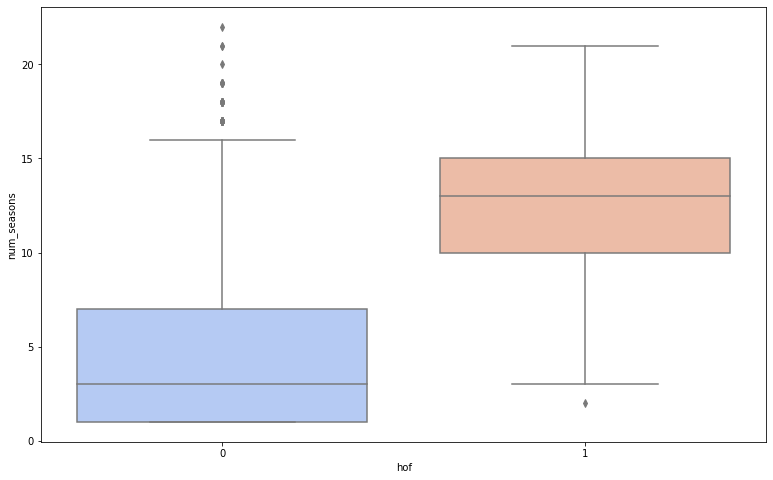

In [51]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='num_seasons',data=hof,palette='coolwarm')

Looks like almost all Hall of Famers have at least 10 seasons played

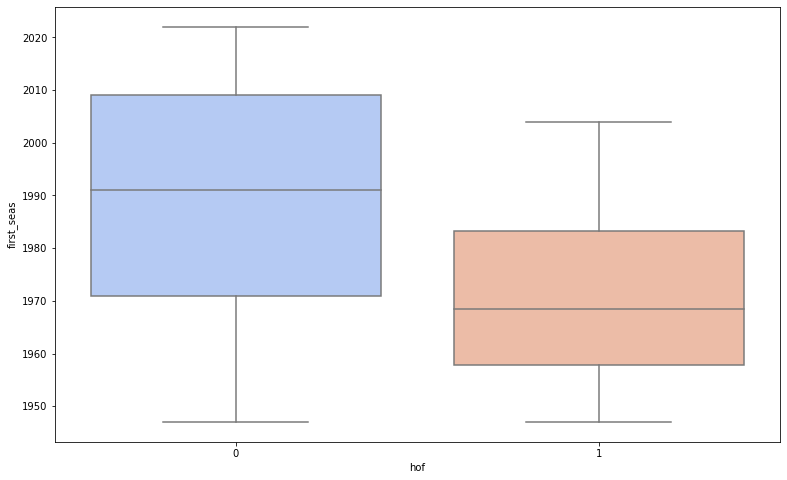

In [52]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='first_seas',data=hof,palette='coolwarm')

Most of all Hall of Famers started their careers before 1990 which is understandable because acceptance to the Hall of Fame happens not right after the end of the career of a player but after some years. That's why a lot of current players are not in Hall of Fame yet.

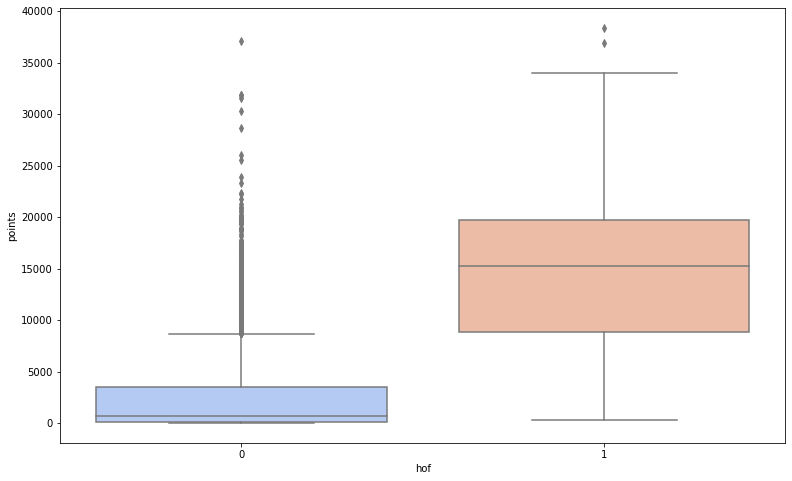

In [53]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='points',data=hof,palette='coolwarm')

Looks like points and getting in HOF might have a good correlation. Assists, steals, rebounds, blocks have a slightly worse correlation with target. 

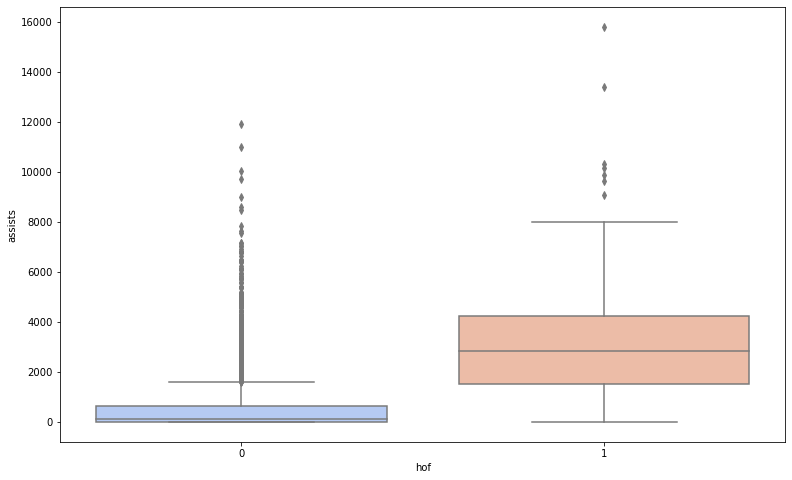

In [54]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='assists',data=hof,palette='coolwarm')

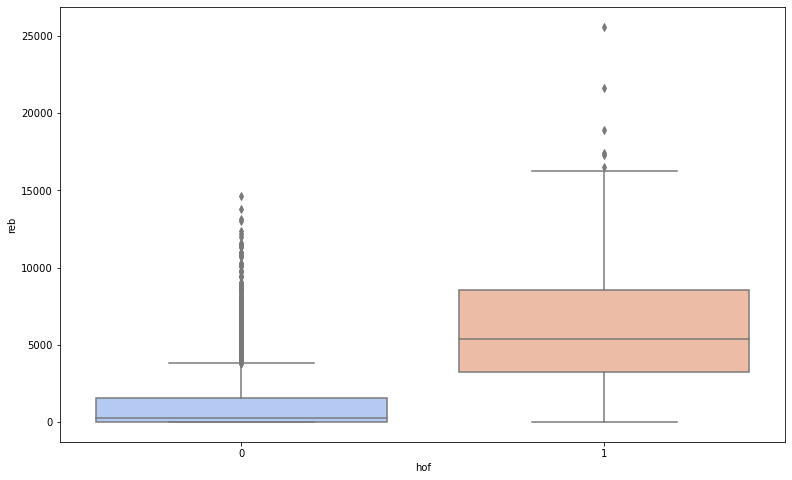

In [55]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='reb',data=hof,palette='coolwarm')

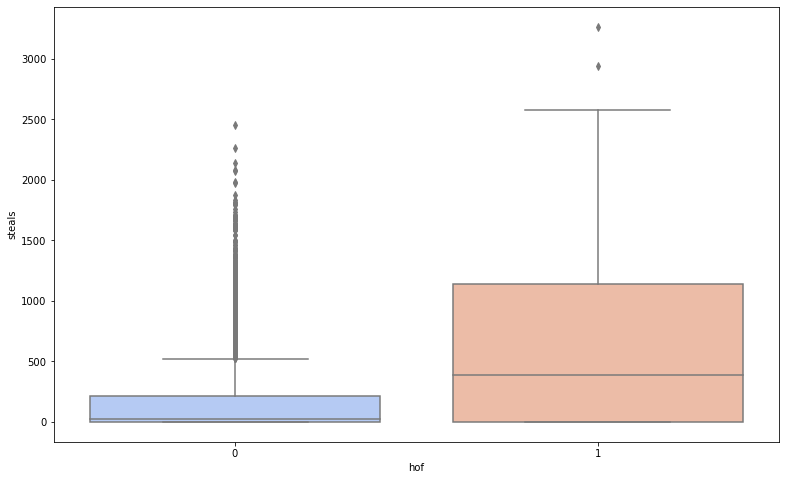

In [56]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='steals',data=hof,palette='coolwarm')

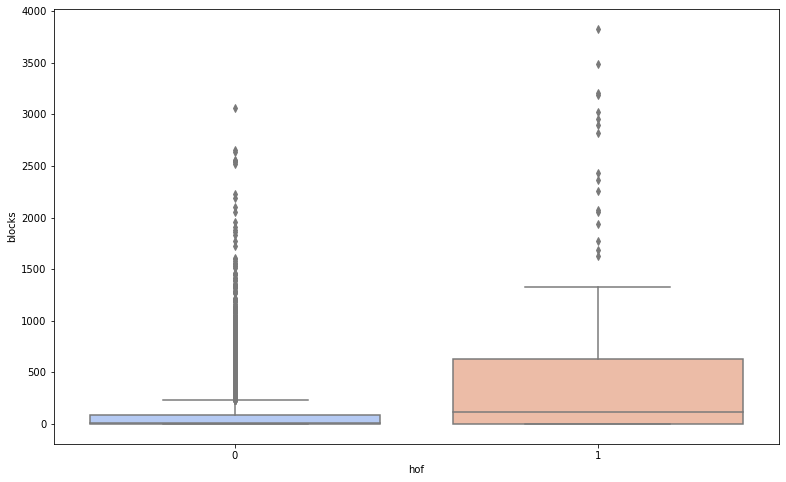

In [57]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='blocks',data=hof,palette='coolwarm')

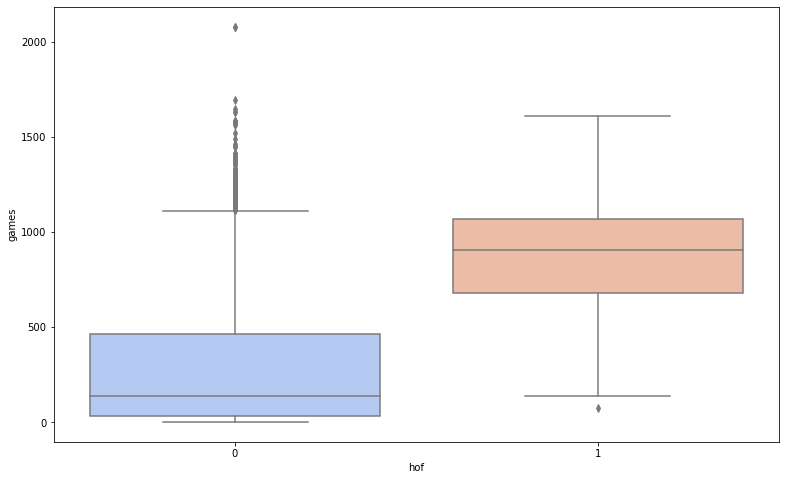

In [58]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='games',data=hof,palette='coolwarm')

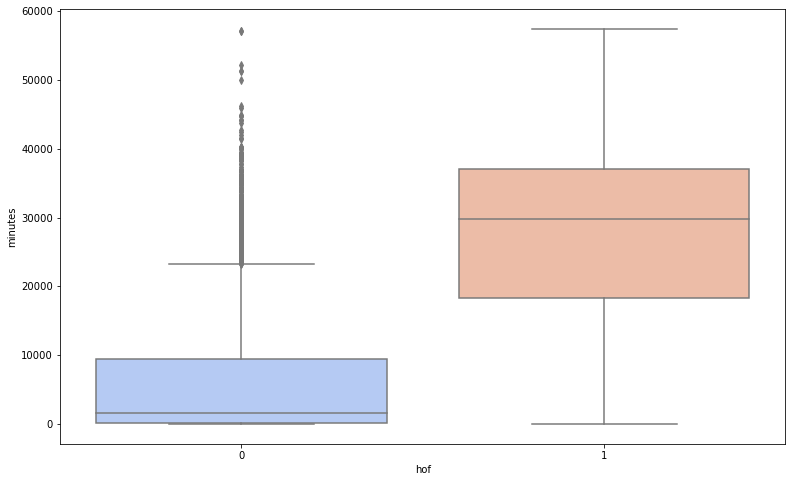

In [59]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='minutes',data=hof,palette='coolwarm')

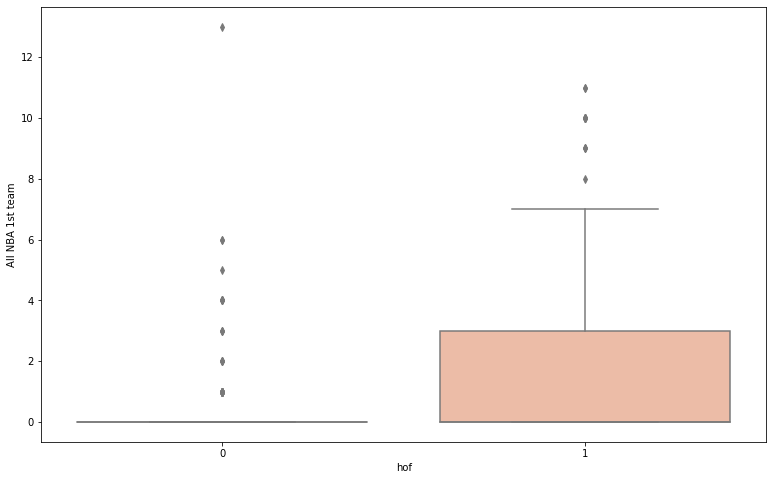

In [60]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='All NBA 1st team',data=hof,palette='coolwarm')

Most of Hall of Famers have been in the 1st or 2nd ALL NBA team in the end of a season.

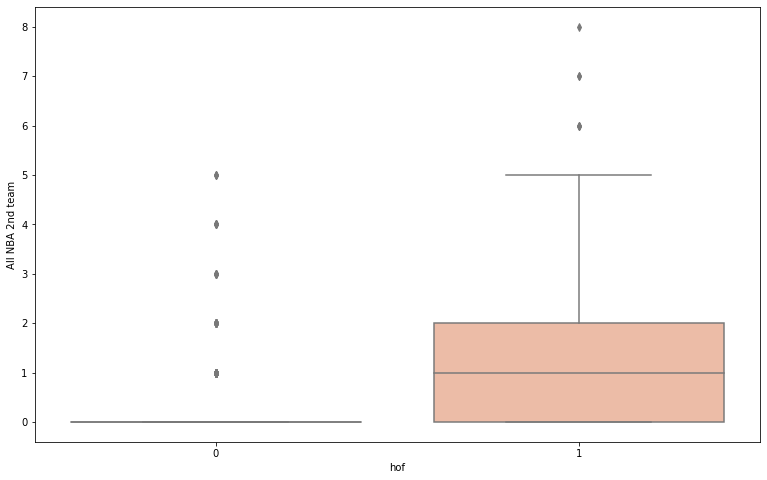

In [61]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='All NBA 2nd team',data=hof,palette='coolwarm')

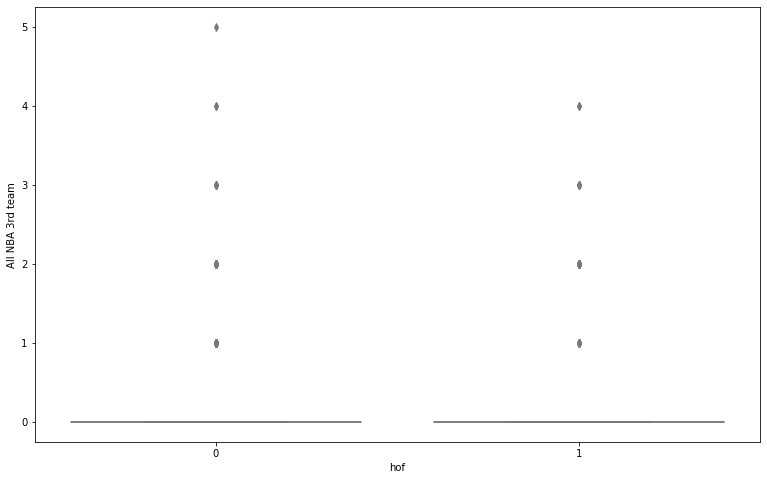

In [62]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='All NBA 3rd team',data=hof,palette='coolwarm')

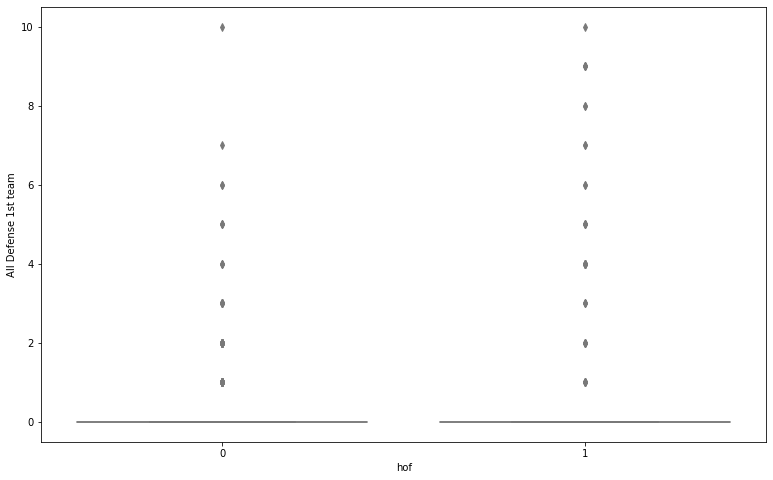

In [63]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='All Defense 1st team',data=hof,palette='coolwarm')

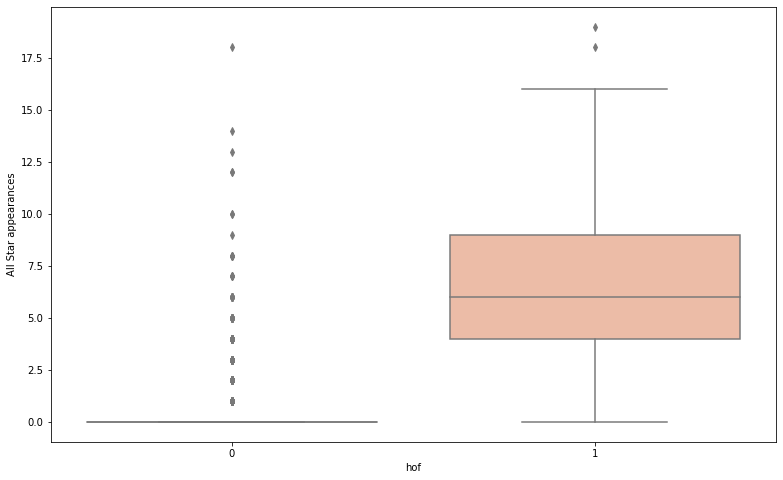

In [64]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='All Star appearances',data=hof,palette='coolwarm')

Seems like most of Hall of Famers have been All Stars at least 4 times.

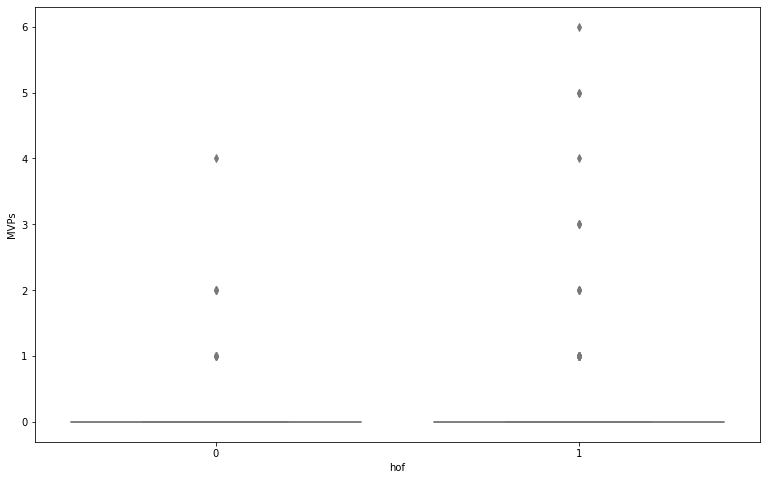

In [65]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='MVPs',data=hof,palette='coolwarm')

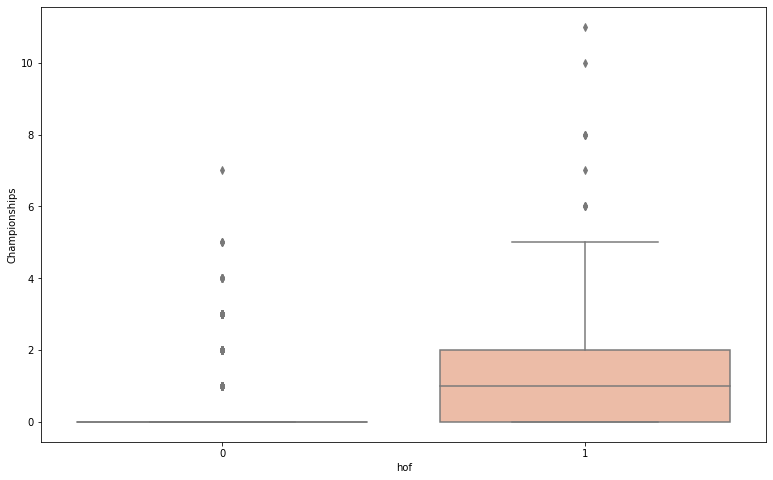

In [66]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='hof',y='Championships',data=hof,palette='coolwarm')

In [283]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.Requirement already up-to-date: kaleido in c:\users\user\anaconda3\lib\site-packages (0.2.1)



Championships play some role too.

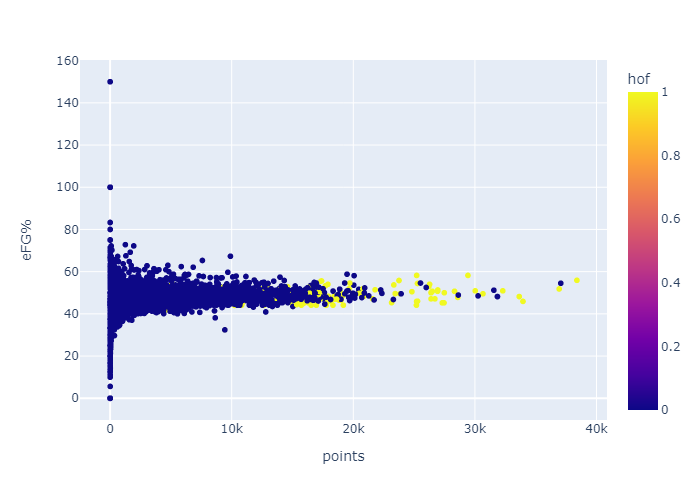

In [68]:
fig=px.scatter(
        hof, x="points", y="eFG%", color='hof', 
        hover_data=['player'])
fig.show('png')

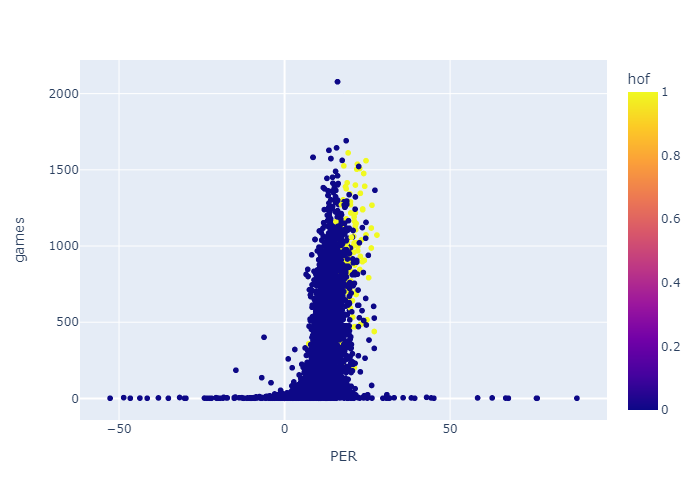

In [70]:
fig=px.scatter(
        hof, x="PER", y="games", color='hof', 
        hover_data=['player'])
fig.show('png')

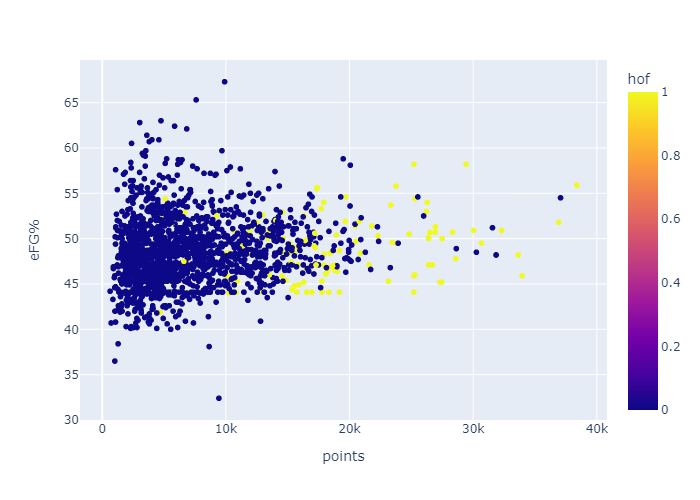

In [71]:
fig=px.scatter(
        hof[hof['games']>300], x="points", y="eFG%", color='hof', 
        hover_data=['player'])
fig.show('png')

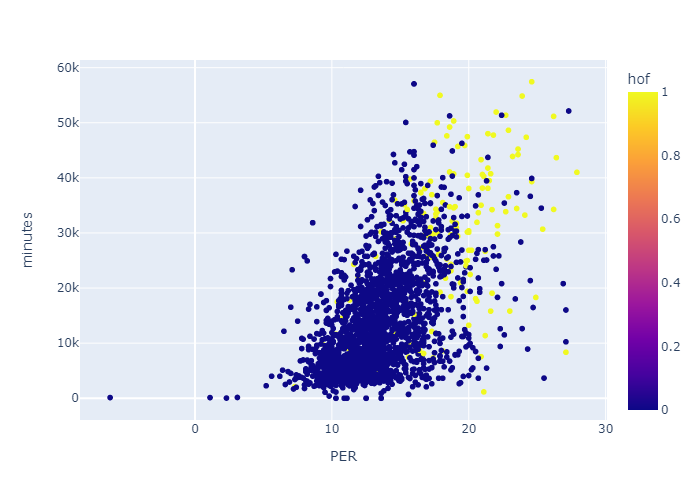

In [72]:
fig=px.scatter(
        hof[hof['games']>200], x="PER", y="minutes", color='hof', 
        hover_data=['player'])
fig.show('png')

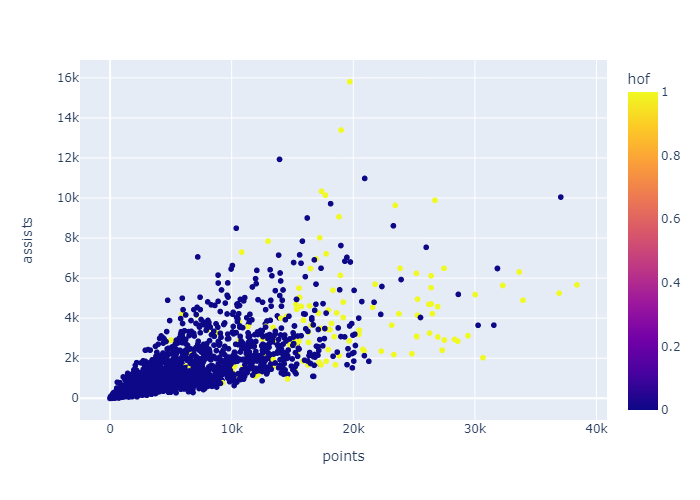

In [73]:
fig=px.scatter(
        hof, x="points", y="assists", color='hof', 
        hover_data=['player'])
fig.show('png')

LeBron's stats stands out(upper-right area).

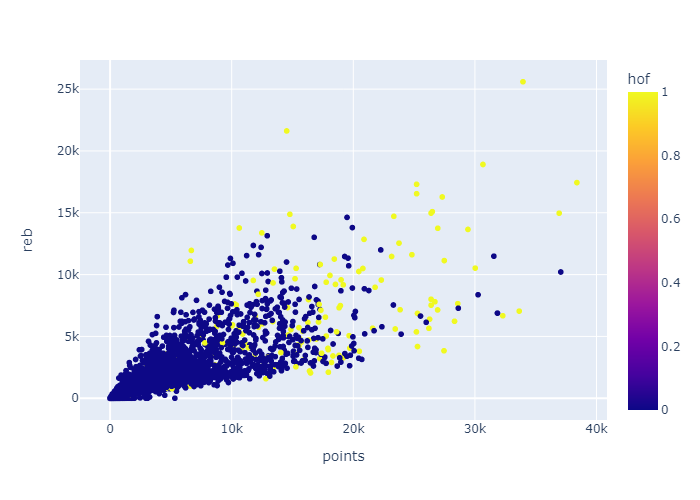

In [74]:
fig=px.scatter(
        hof, x="points", y="reb", color='hof', 
        hover_data=['player'])
fig.show('png')

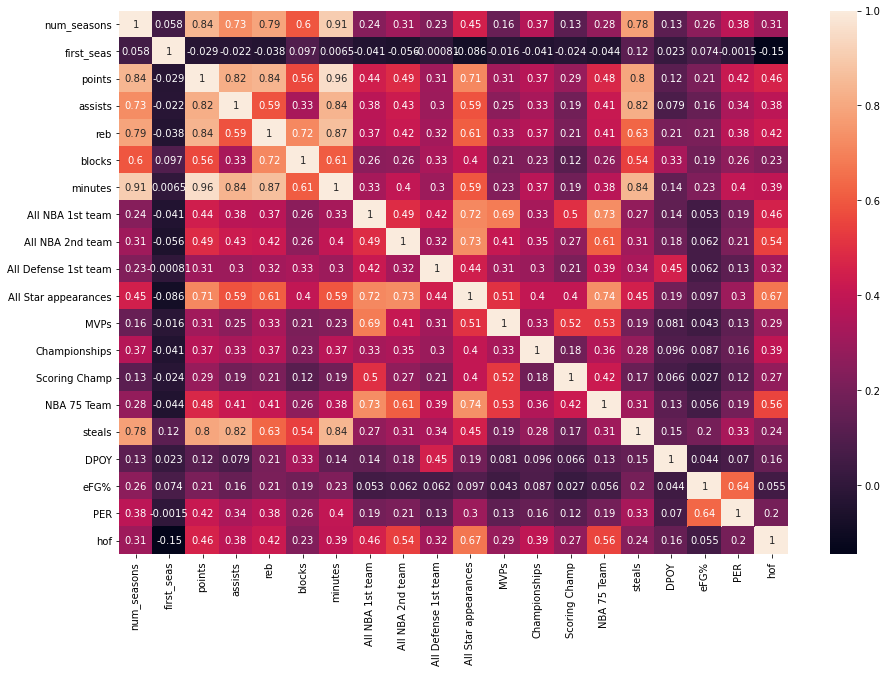

In [203]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hof[['num_seasons','first_seas','points','assists','reb','blocks','minutes','All NBA 1st team','All NBA 2nd team',
                'All Defense 1st team','All Star appearances','MVPs','Championships','Scoring Champ',
                 'NBA 75 Team','steals','DPOY','eFG%','PER','hof']].corr(),annot=True)

Now let's do machine learning and predictions. I am going to separate the dataset, players that started their careers before 2000s will be in the training data slice. That way we will see which current players our model will have as Hall of Famers based on their career achievements.

In [242]:
young=hof[hof['first_seas']>2000]
old=hof[hof['first_seas']<2000]
X_train=old.drop(['birth_year','player_id','first_seas','last_seas','hof','player'],axis=1)
y_train=old['hof']
X_test=young.drop(['birth_year','player_id','first_seas','last_seas','hof','player'],axis=1)
y_test=young['hof']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
knn_prob=knn.predict_proba(X_test)[:,0-1]

logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)
pred_log=logmodel.predict(X_test)
log_prob=logmodel.predict_proba(X_test)[:,0-1]

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
rfc_prob=rfc.predict_proba(X_test)[:,0-1]


print('Logistic Regression')
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

print('Random Forest')
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))


print('K Nearest Neighbor')
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))




Logistic Regression
[[1760   33]
 [   1    2]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1793
           1       0.06      0.67      0.11         3

    accuracy                           0.98      1796
   macro avg       0.53      0.82      0.55      1796
weighted avg       1.00      0.98      0.99      1796

Random Forest
[[1764   29]
 [   1    2]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1793
           1       0.06      0.67      0.12         3

    accuracy                           0.98      1796
   macro avg       0.53      0.83      0.55      1796
weighted avg       1.00      0.98      0.99      1796

K Nearest Neighbor
[[1753   40]
 [   3    0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1793
           1       0.00      0.00      0.00         3

    accuracy                           0.98     

Let's see which players were predicted to be Hall of Famers

In [246]:
res=pd.concat([X_test,y_test],axis=1)

res['log_pred']=pred_log
res['log_prob']=log_prob

res['rfc_pred']=pred_rfc
res['rfc_prob']=rfc_prob

res['knn_pred']=pred_knn
res['knn_prob']=knn_prob

res_final=pd.concat([res,hof['player']],axis=1)

In [247]:
res_final[(res_final['hof']==0)&((res_final['log_pred']==1)|(res_final['knn_pred']==1)|(res_final['rfc_pred']==1))].head(60)

,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,eFG%,PER,hof,log_pred,log_prob,rfc_pred,rfc_prob,knn_pred,knn_prob,player
3316,11.0,12157.0,3183.0,2357.0,155.0,958.0,622.0,21147.0,0.0,1.0,...,48.2,19.6,0.0,0.0,0.107407,0.0,0.145,1.0,1.0,Gilbert Arenas
3326,18.0,22352.0,5581.0,5780.0,291.0,1209.0,1490.0,50060.0,0.0,0.0,...,49.7,15.4,0.0,0.0,0.217463,1.0,0.555,1.0,1.0,Joe Johnson
3341,18.0,22258.0,4188.0,11995.0,2054.0,641.0,1322.0,43712.0,0.0,2.0,...,51.3,21.4,0.0,1.0,0.975300,1.0,0.760,0.0,0.0,Pau Gasol
3355,18.0,19473.0,7036.0,3396.0,98.0,1053.0,1254.0,38279.0,0.0,3.0,...,50.8,18.2,0.0,1.0,0.994144,1.0,0.570,0.0,0.0,Tony Parker
3365,14.0,16674.0,1095.0,6961.0,1092.0,665.0,905.0,27499.0,1.0,4.0,...,53.8,21.8,0.0,1.0,0.603239,1.0,0.680,0.0,0.0,Amar'e Stoudemire
3395,3.0,733.0,428.0,381.0,25.0,126.0,140.0,3096.0,0.0,0.0,...,38.4,7.1,0.0,0.0,0.007779,0.0,0.035,1.0,1.0,Junior Harrington
3434,19.0,30259.0,3643.0,8371.0,690.0,1291.0,1337.0,46265.0,0.0,2.0,...,48.5,19.5,0.0,1.0,0.979503,1.0,0.850,1.0,1.0,Carmelo Anthony
3444,16.0,23930.0,5929.0,5185.0,932.0,1681.0,1121.0,37309.0,2.0,3.0,...,49.5,23.5,0.0,1.0,0.999910,1.0,0.980,1.0,1.0,Dwyane Wade
3462,19.0,37062.0,10045.0,10210.0,1041.0,2136.0,1366.0,52139.0,13.0,3.0,...,54.5,27.3,0.0,1.0,1.000000,1.0,0.970,1.0,1.0,LeBron James
3519,18.0,19485.0,1676.0,14627.0,2228.0,1081.0,1242.0,39457.0,5.0,1.0,...,58.8,21.3,0.0,1.0,0.995113,1.0,0.825,0.0,0.0,Dwight Howard


It's clear that Logistic Regression model and Random Forest model made more realistic predictions than KNN model which classified players like Enes Freedom or Eric Bledsoe as possible Hall of Famers. Also KNN model failed to classify any player of 3 players that already got into Hall of Fame.

Let's see which players were left out. I will sort those who have more than 3 All Star appearances since we saw that this is the most correlated feature to the target column.

In [254]:
res_final[(res_final['hof']==0)&((res_final['log_pred']==0)|(res_final['rfc_pred']==0))&(res_final['All Star appearances']>3)]

,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,eFG%,PER,hof,log_pred,log_prob,rfc_pred,rfc_prob,knn_pred,knn_prob,player
3326,18.0,22352.0,5581.0,5780.0,291.0,1209.0,1490.0,50060.0,0.0,0.0,...,49.7,15.4,0.0,0.0,0.217463,1.0,0.555,1.0,1.0,Joe Johnson
3700,16.0,14651.0,2407.0,7787.0,1058.0,1337.0,1118.0,30875.0,0.0,0.0,...,51.3,18.7,0.0,0.0,0.033152,0.0,0.160,0.0,0.0,Paul Millsap
3703,16.0,10373.0,8491.0,4940.0,142.0,1676.0,1109.0,32055.0,0.0,0.0,...,48.3,15.8,0.0,1.0,0.808569,0.0,0.315,1.0,1.0,Rajon Rondo
3733,15.0,12989.0,3144.0,7771.0,1126.0,762.0,950.0,30597.0,0.0,0.0,...,54.4,18.5,0.0,0.0,0.136184,1.0,0.535,0.0,0.0,Al Horford
3871,13.0,19869.0,3729.0,4227.0,280.0,935.0,957.0,32789.0,0.0,2.0,...,47.8,18.9,0.0,0.0,0.464233,1.0,0.665,1.0,1.0,DeMar DeRozan
3925,11.0,15540.0,2458.0,7991.0,880.0,1043.0,815.0,23405.0,0.0,2.0,...,48.1,22.0,0.0,0.0,0.457831,0.0,0.445,1.0,1.0,DeMarcus Cousins
3950,10.0,11702.0,5557.0,2612.0,427.0,1018.0,613.0,21833.0,0.0,0.0,...,46.2,19.2,0.0,1.0,0.580385,0.0,0.245,0.0,0.0,John Wall
4022,11.0,13437.0,3099.0,4000.0,362.0,1250.0,755.0,25049.0,0.0,0.0,...,49.2,21.1,0.0,0.0,0.171441,0.0,0.440,0.0,0.0,Jimmy Butler
4033,11.0,14414.0,3919.0,2815.0,280.0,921.0,741.0,24666.0,0.0,0.0,...,48.8,19.1,0.0,0.0,0.185748,0.0,0.115,0.0,0.0,Kemba Walker
4035,9.0,12647.0,1504.0,2255.0,349.0,577.0,647.0,21281.0,0.0,0.0,...,55.0,16.4,0.0,1.0,0.654938,0.0,0.395,0.0,0.0,Klay Thompson


Jimmy Butler stands out since not any model predicted him get into the Hall of Fame. Perhaps the reason is that Jimmy usually shines more in Playoffs so his regular season achievements don't help him here. 
Let's see the one player that was no classified as HOFer although he actually is.

In [255]:
res_final[(res_final['hof']==1)&((res_final['log_pred']==0)|(res_final['rfc_pred']==0))]

,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,eFG%,PER,hof,log_pred,log_prob,rfc_pred,rfc_prob,knn_pred,knn_prob,player
3400,16.0,14043.0,4001.0,3697.0,319.0,1392.0,1057.0,26859.0,0.0,0.0,...,52.0,20.2,1.0,0.0,0.483778,0.0,0.39,0.0,0.0,Manu Ginóbili


So it is Manu Ginobili who's acceptance ceremony was three weeks ago. He is actually very close by his probability numbers to be counted as HOFer by the models. Let's see his achievements:

In [256]:
hof.iloc[3400]

player_id                         3401
player                   Manu Ginóbili
birth_year                         NaN
hof                                  1
num_seasons                         16
first_seas                        2003
last_seas                         2018
points                           14043
assists                           4001
reb                               3697
blocks                             319
steals                            1392
games                             1057
minutes                          26859
All NBA 1st team                     0
All NBA 2nd team                     0
All NBA 3rd team                     2
All Defense 1st team                 0
All Defense 2nd team                 0
All Rookie 1st team                  0
All Rookie 2nd team                  1
All ABA 1st team                     0
All ABA 2nd team                     0
All Star appearances                 2
MVPs                                 0
DPOY                     

So, only two All Star appearances which might be the reason why models classified him as not a HOFer. He has 4 championships that is probably what gave him the probability close to 0.5.